This script is designed to quantify similarities and differences between two aspects of the visual pathway in object recognition.

DICE COEEFICIENT 

In [6]:
# calculate dice coefficient between pIPS and LO FC maps
import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image
import matplotlib.pyplot as plt

# Define study directories
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
group_out_dir = f'{results_dir}/group_averages'

def dice_coefficient(img1, img2):
    """Calculate Dice coefficient between two binary images."""
    # Get data arrays and ensure binary
    img1_data = (img1.get_fdata() > 0).astype(int)
    img2_data = (img2.get_fdata() > 0).astype(int)
    
    # Calculate intersection
    intersection = np.sum(img1_data * img2_data)
    
    # Calculate Dice using standard formula: 2*intersection/(sum of elements)
    dice = 2.0 * intersection / (np.sum(img1_data) + np.sum(img2_data))
    
    return dice

def main():
    # Define ROIs and hemispheres
    rois = ['pIPS', 'LO']
    hemispheres = ['left', 'right']
    analysis_type = 'fc'  # Using fc as specified in your goal
    
    # Create a results table
    results = []
    
    # Compare across hemispheres
    for hemi in hemispheres:
        # Load images
        pips_img_path = f'{group_out_dir}/pIPS_{hemi}_{analysis_type}_thresh.nii.gz'
        lo_img_path = f'{group_out_dir}/LO_{hemi}_{analysis_type}_thresh.nii.gz'
        
        # Check if files exist
        if not os.path.exists(pips_img_path):
            print(f"Warning: File not found - {pips_img_path}")
            continue
            
        if not os.path.exists(lo_img_path):
            print(f"Warning: File not found - {lo_img_path}")
            continue
            
        # Both files exist, proceed with analysis
        pips_img = nib.load(pips_img_path)
        lo_img = nib.load(lo_img_path)
        
        # Calculate Dice coefficient
        dice_score = dice_coefficient(pips_img, lo_img)
        
        results.append({
            'Hemisphere': hemi,
            'ROI1': 'pIPS',
            'ROI2': 'LO',
            'Dice': dice_score
        })
        
        print(f"Dice coefficient for {hemi} hemisphere, pIPS vs LO: {dice_score:.4f}")
    
    # Check if we have any results
    if not results:
        print("No results were calculated. Please check if the input files exist.")
        return None
    
    # Convert results to DataFrame for easy viewing
    results_df = pd.DataFrame(results)
    print("\nResults summary:")
    print(results_df)
    
    # Create a simple bar plot of results
    plt.figure(figsize=(8, 6))
    bars = plt.bar(
        [f"{r['Hemisphere']} hemisphere" for r in results],
        [r['Dice'] for r in results]
    )
    plt.title('Dice Coefficient Between pIPS and LO FC Maps')
    plt.ylabel('Dice Coefficient')
    plt.ylim(0, 1)  # Dice coef ranges from 0-1
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.,
            height + 0.01,
            f'{height:.4f}',
            ha='center', va='bottom'
        )
    
    # Save plot
    plot_path = f'{results_dir}/pIPS_LO_dice_comparison.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Saved plot to: {plot_path}")
    plt.close()
    
    return results_df

if __name__ == "__main__":
    results = main()

Dice coefficient for left hemisphere, pIPS vs LO: 0.6965
Dice coefficient for right hemisphere, pIPS vs LO: 0.6930

Results summary:
  Hemisphere  ROI1 ROI2      Dice
0       left  pIPS   LO  0.696452
1      right  pIPS   LO  0.692965
Saved plot to: /user_data/csimmon2/git_repos/ptoc/results/pIPS_LO_dice_comparison.png



ANALYSIS TYPE: FC

Left hemisphere analysis (fc):
Dice coefficient: 0.6965
pIPS only: 13341 voxels (32.4%)
LO only: 5832 voxels (14.2%)
Overlap: 21995 voxels (53.4%)

Right hemisphere analysis (fc):
Dice coefficient: 0.6930
pIPS only: 13908 voxels (34.6%)
LO only: 4982 voxels (12.4%)
Overlap: 21317 voxels (53.0%)

ANALYSIS TYPE: PPI

Left hemisphere analysis (ppi):
Dice coefficient: 0.7870
pIPS only: 2406 voxels (13.1%)
LO only: 4051 voxels (22.0%)
Overlap: 11926 voxels (64.9%)

Right hemisphere analysis (ppi):
Dice coefficient: 0.7056
pIPS only: 7619 voxels (31.9%)
LO only: 3248 voxels (13.6%)
Overlap: 13025 voxels (54.5%)

FC Results summary:
  Analysis Hemisphere      Dice  pIPS_only  LO_only  Overlap  Total  \
0       fc       left  0.696452      13341     5832    21995  41168   
1       fc      right  0.692965      13908     4982    21317  40207   

   pIPS_only_pct  LO_only_pct  Overlap_pct  
0      32.406238    14.166343    53.427419  
1      34.590992    12.390877    53.018131

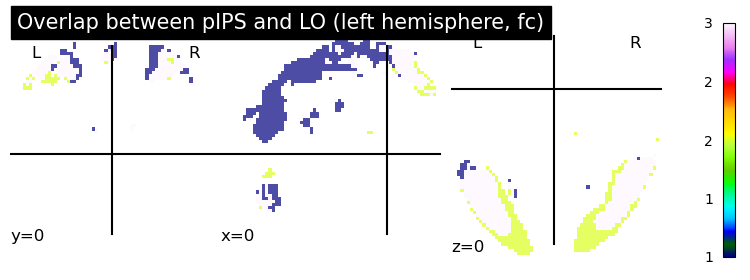

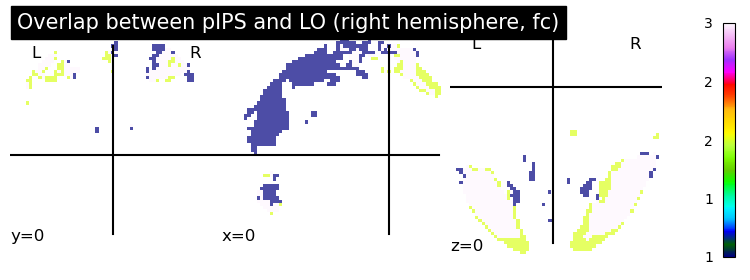

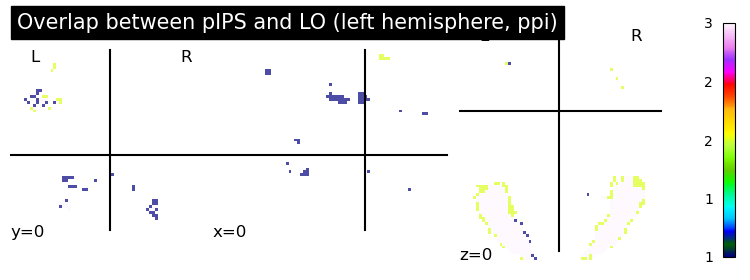

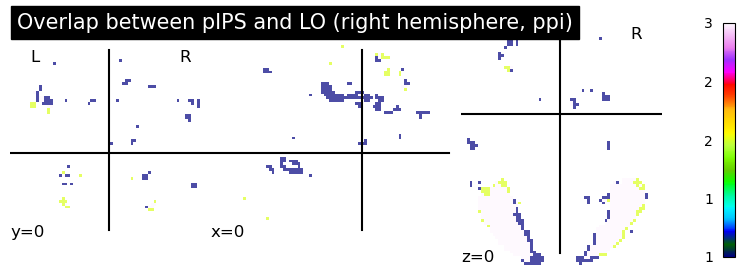

In [9]:
# Break down the overlap between pIPS and LO for review of results
## add PPI
import os
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting

# Define study directories
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
group_out_dir = f'{results_dir}/group_averages'

def dice_coefficient(img1, img2):
    """Calculate Dice coefficient between two binary images."""
    # Get data arrays and ensure binary
    img1_data = (img1.get_fdata() > 0).astype(int)
    img2_data = (img2.get_fdata() > 0).astype(int)
    
    # Calculate intersection
    intersection = np.sum(img1_data * img2_data)
    
    # Calculate Dice using standard formula: 2*intersection/(sum of elements)
    dice = 2.0 * intersection / (np.sum(img1_data) + np.sum(img2_data))
    
    return dice, img1_data, img2_data

def main():
    # Define hemispheres and analysis types
    hemispheres = ['left', 'right']
    analysis_types = ['fc', 'ppi']
    
    # Create results tables
    results = []
    
    # Loop through analysis types
    for analysis_type in analysis_types:
        print(f"\n{'='*50}")
        print(f"ANALYSIS TYPE: {analysis_type.upper()}")
        print(f"{'='*50}")
        
        # Compare across hemispheres
        for hemi in hemispheres:
            # Load images
            pips_img_path = f'{group_out_dir}/pIPS_{hemi}_{analysis_type}_thresh.nii.gz'
            lo_img_path = f'{group_out_dir}/LO_{hemi}_{analysis_type}_thresh.nii.gz'
            
            # Check if files exist
            if not os.path.exists(pips_img_path) or not os.path.exists(lo_img_path):
                print(f"Warning: Files not found for {hemi} hemisphere, {analysis_type}. Skipping.")
                continue
                
            # Load images
            pips_img = nib.load(pips_img_path)
            lo_img = nib.load(lo_img_path)
            
            # Calculate Dice coefficient
            dice_score, pips_data, lo_data = dice_coefficient(pips_img, lo_img)
            
            # Create overlap map (1=pIPS only, 2=LO only, 3=overlap)
            overlap_data = np.zeros_like(pips_data)
            overlap_data[pips_data == 1] = 1  # pIPS only
            overlap_data[lo_data == 1] = 2    # LO only
            overlap_data[(pips_data == 1) & (lo_data == 1)] = 3  # Overlap
            
            # Count voxels in each category
            pips_only = np.sum(overlap_data == 1)
            lo_only = np.sum(overlap_data == 2)
            overlap_count = np.sum(overlap_data == 3)
            total_voxels = pips_only + lo_only + overlap_count
            
            # Save overlap map
            overlap_img = nib.Nifti1Image(overlap_data, pips_img.affine, pips_img.header)
            overlap_path = f'{results_dir}/pIPS_LO_{hemi}_{analysis_type}_overlap.nii.gz'
            nib.save(overlap_img, overlap_path)
            
            # Create visualization
            display = plotting.plot_roi(
                roi_img=overlap_img,
                bg_img=None,
                display_mode='ortho',
                colorbar=True,
                cut_coords=(0, 0, 0),
                title=f'Overlap between pIPS and LO ({hemi} hemisphere, {analysis_type})'
            )
            display.savefig(f'{results_dir}/pIPS_LO_{hemi}_{analysis_type}_overlap_viz.png', dpi=300)
            
            # Store results
            results.append({
                'Analysis': analysis_type,
                'Hemisphere': hemi,
                'Dice': dice_score,
                'pIPS_only': pips_only,
                'LO_only': lo_only,
                'Overlap': overlap_count,
                'Total': total_voxels,
                'pIPS_only_pct': pips_only/total_voxels*100,
                'LO_only_pct': lo_only/total_voxels*100,
                'Overlap_pct': overlap_count/total_voxels*100
            })
            
            print(f"\n{hemi.capitalize()} hemisphere analysis ({analysis_type}):")
            print(f"Dice coefficient: {dice_score:.4f}")
            print(f"pIPS only: {pips_only} voxels ({pips_only/total_voxels*100:.1f}%)")
            print(f"LO only: {lo_only} voxels ({lo_only/total_voxels*100:.1f}%)")
            print(f"Overlap: {overlap_count} voxels ({overlap_count/total_voxels*100:.1f}%)")
    
    # Create DataFrame from results
    results_df = pd.DataFrame(results)
    
    # Print summary by analysis type
    for analysis_type in analysis_types:
        analysis_results = results_df[results_df['Analysis'] == analysis_type]
        if not analysis_results.empty:
            print(f"\n{analysis_type.upper()} Results summary:")
            print(analysis_results)
    
    return results_df

if __name__ == "__main__":
    results = main()

FINGERPRINT CONNECTIVITY


=== Step 1: Creating Merged Atlas ===
Loaded pIPS ROI
Loaded LO ROI
Loaded Schaefer atlas with 200 parcels
pIPS overlaps with 28 atlas parcels
  Label 9 (7Networks_LH_Vis_9): 7 voxels
  Label 11 (7Networks_LH_Vis_11): 159 voxels
  Label 12 (7Networks_LH_Vis_12): 2 voxels
  Label 13 (7Networks_LH_Vis_13): 381 voxels
  Label 14 (7Networks_LH_Vis_14): 528 voxels
  Label 33 (7Networks_LH_DorsAttn_Post_3): 554 voxels
  Label 36 (7Networks_LH_DorsAttn_Post_6): 4 voxels
  Label 37 (7Networks_LH_DorsAttn_Post_7): 567 voxels
  Label 38 (7Networks_LH_DorsAttn_Post_8): 64 voxels
  Label 39 (7Networks_LH_DorsAttn_Post_9): 99 voxels
  Label 40 (7Networks_LH_DorsAttn_Post_10): 15 voxels
  Label 62 (7Networks_LH_Cont_Par_2): 269 voxels
  Label 71 (7Networks_LH_Cont_pCun_1): 247 voxels
  Label 80 (7Networks_LH_Default_Par_2): 436 voxels
  Label 82 (7Networks_LH_Default_Par_4): 85 voxels
  Label 99 (7Networks_LH_Default_pCunPCC_4): 5 voxels
  Label 111 (7Networks_RH_Vis_11): 119 voxels
  Label 112 (7N

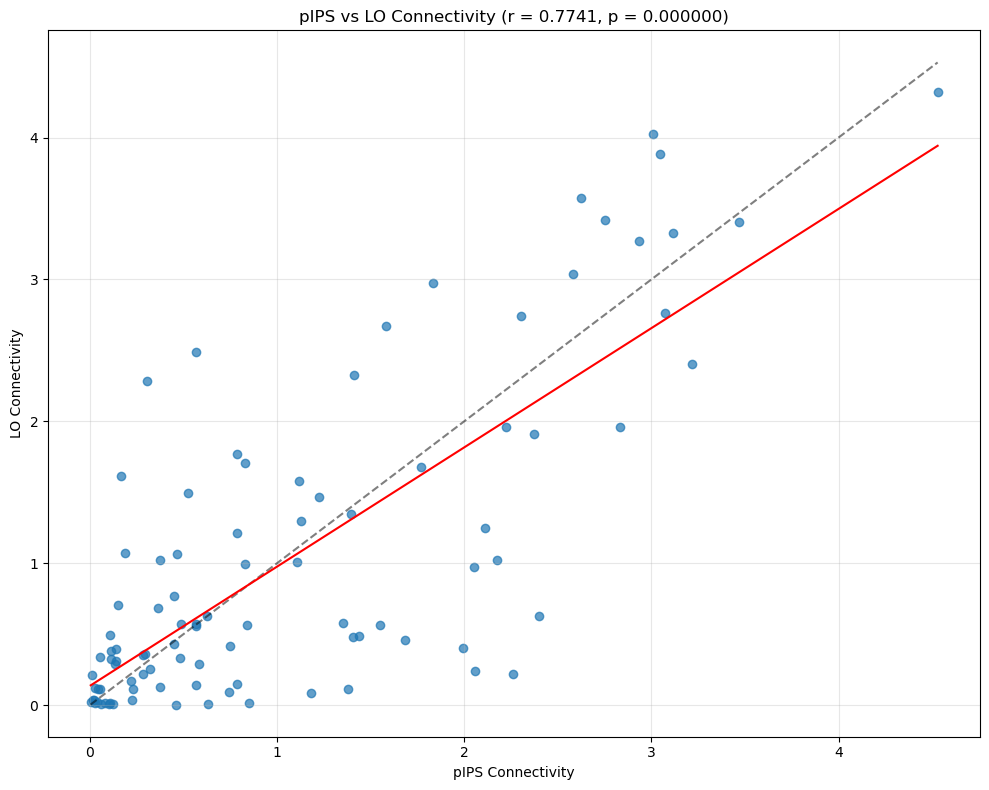

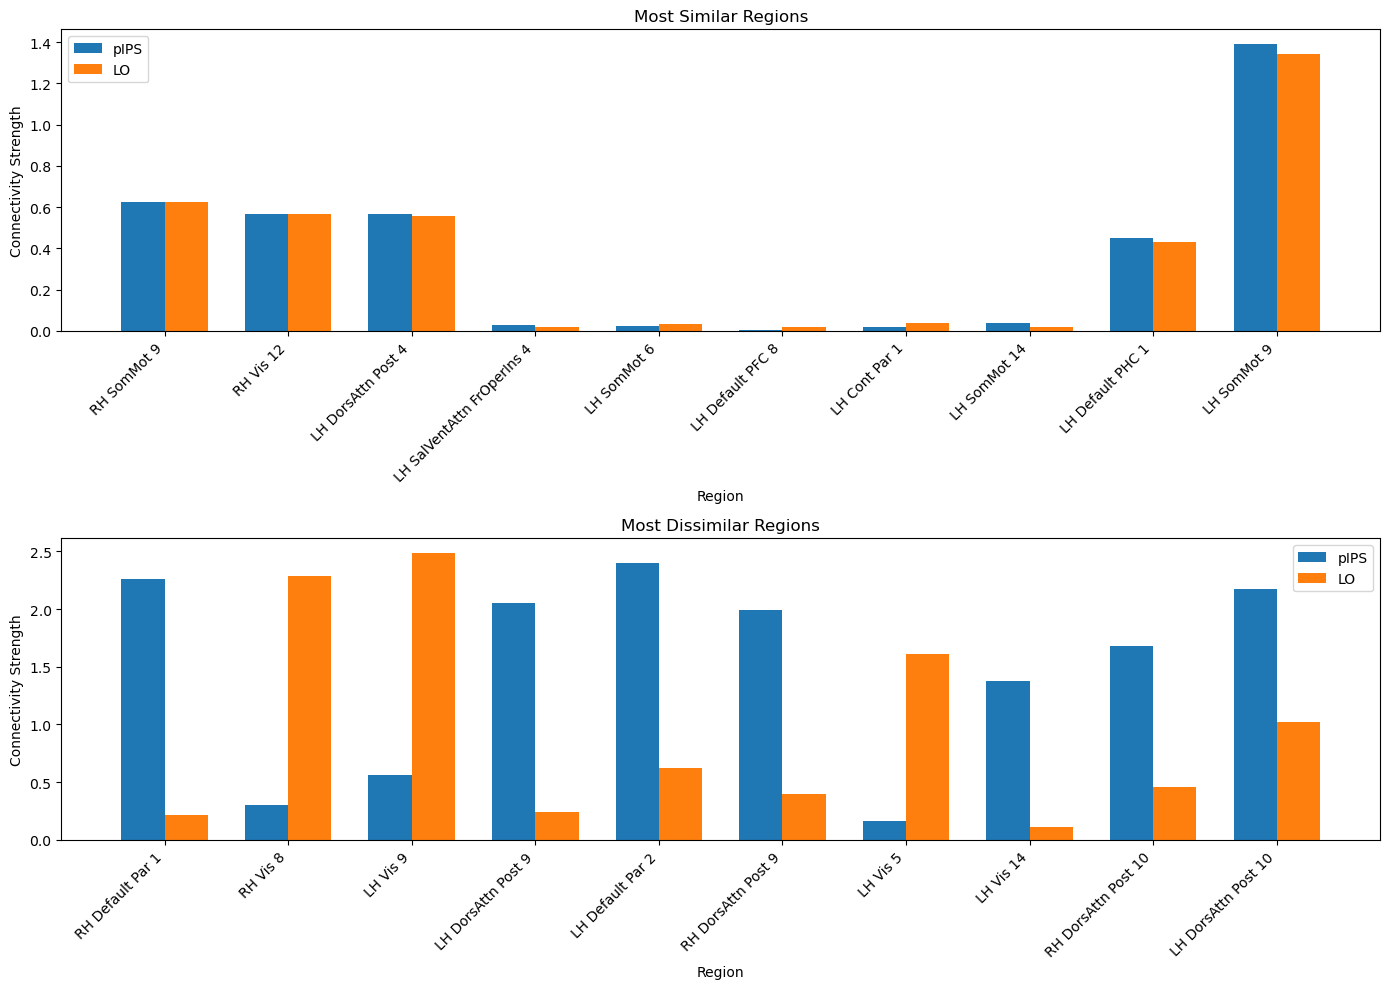

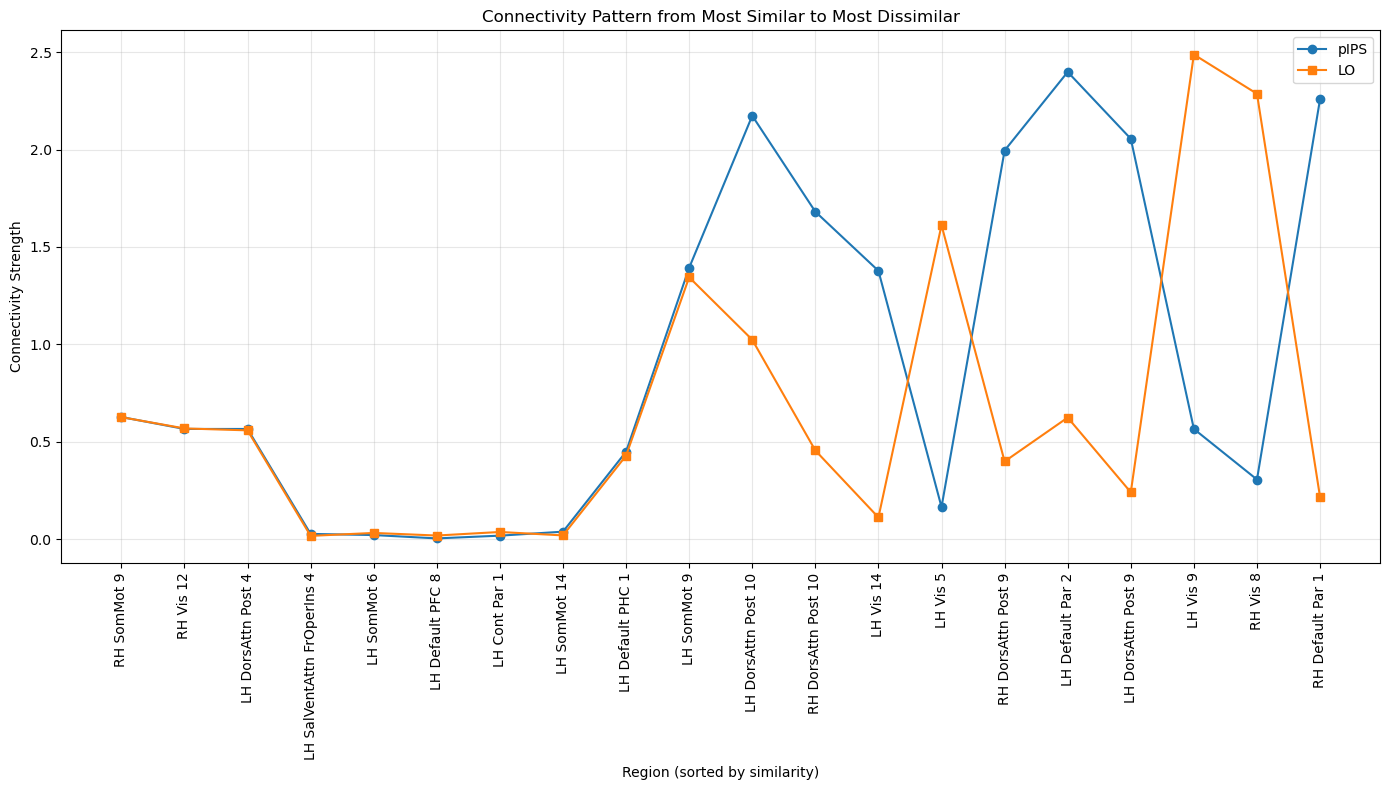

Results visualization complete

=== ANALYSIS SUMMARY ===
Correlation between pIPS and LO connectivity: r = 0.7741, p = 0.000000
Number of regions analyzed: 96


In [11]:
# create merged atlas
import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image, datasets, plotting
from nilearn.maskers import NiftiLabelsMasker
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define paths
base_dir = '/user_data/csimmon2/git_repos/ptoc'
roi_dir = f'{base_dir}/roiParcels'
results_dir = f'{base_dir}/results'
group_out_dir = f'{results_dir}/group_averages'
os.makedirs(results_dir, exist_ok=True)

def create_merged_atlas():
    """
    Create a merged atlas where Wang ROIs replace overlapping regions in Schaefer atlas
    """
    print("\n=== Step 1: Creating Merged Atlas ===")
    
    # Load Wang ROIs - pIPS and LO
    roi_files = {
        'pIPS': f'{roi_dir}/pIPS.nii.gz',
        'LO': f'{roi_dir}/LO.nii.gz'
    }
    
    rois = {}
    for roi_name, roi_path in roi_files.items():
        if os.path.exists(roi_path):
            rois[roi_name] = nib.load(roi_path)
            print(f"Loaded {roi_name} ROI")
        else:
            print(f"Error: ROI file {roi_path} not found!")
            return None
    
    # Load Schaefer atlas
    atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=2)
    atlas_img = nib.load(atlas.maps)
    atlas_labels = atlas.labels
    print(f"Loaded Schaefer atlas with {len(atlas_labels)} parcels")
    
    # Get atlas data
    atlas_data = atlas_img.get_fdata()
    modified_atlas_data = atlas_data.copy()
    
    # Create a dictionary to store new labels
    new_labels = list(atlas_labels)
    
    # Assign values for new ROIs (continuing from the end of the Schaefer atlas)
    roi_values = {'pIPS': 201, 'LO': 202}
    overlap_info = {}
    
    # Process each ROI
    for roi_name, roi_img in rois.items():
        # Get ROI data and create mask
        roi_data = roi_img.get_fdata()
        roi_mask = roi_data > 0
        
        # Find overlapping parcels
        overlap_mask = (atlas_data > 0) & roi_mask
        overlapping_labels = np.unique(atlas_data[overlap_mask])
        overlapping_labels = overlapping_labels[overlapping_labels > 0]
        
        # Get number of voxels in overlap
        overlap_voxels = {}
        for label in overlapping_labels:
            label_mask = (atlas_data == label) & roi_mask
            overlap_voxels[int(label)] = np.sum(label_mask)
        
        # Store overlap information
        overlap_info[roi_name] = {
            'overlapping_labels': overlapping_labels.tolist(),
            'overlap_voxels': overlap_voxels
        }
        
        print(f"{roi_name} overlaps with {len(overlapping_labels)} atlas parcels")
        for label, voxels in overlap_voxels.items():
            label_idx = int(label) - 1  # Convert to 0-indexed
            if 0 <= label_idx < len(atlas_labels):
                label_name = atlas_labels[label_idx]
                label_name = label_name.decode('utf-8') if isinstance(label_name, bytes) else str(label_name)
                print(f"  Label {label} ({label_name}): {voxels} voxels")
        
        # Remove overlapping parcels from the atlas
        for label in overlapping_labels:
            label_mask = (modified_atlas_data == label) & roi_mask
            modified_atlas_data[label_mask] = 0
        
        # Add ROI with new label
        modified_atlas_data[roi_mask] = roi_values[roi_name]
        
        # Add new label name
        new_labels.append(f"Wang_{roi_name}")
    
    # Create the modified atlas
    modified_atlas_img = nib.Nifti1Image(modified_atlas_data, atlas_img.affine, atlas_img.header)
    merged_atlas_file = f'{results_dir}/schaefer_wang_merged.nii.gz'
    nib.save(modified_atlas_img, merged_atlas_file)
    print(f"Saved merged atlas to: {merged_atlas_file}")
    
    # Save new labels array
    np.save(f'{results_dir}/merged_atlas_labels.npy', new_labels)
    
    # Return atlas information
    return {
        'atlas_img': atlas_img,
        'merged_atlas_img': modified_atlas_img,
        'atlas_labels': atlas_labels,
        'merged_labels': new_labels,
        'roi_values': roi_values,
        'overlap_info': overlap_info
    }

def visualize_merged_atlas(atlas_info):
    """
    Create visualizations of the merged atlas to verify proper integration
    """
    print("\n=== Step 2: Visualizing Merged Atlas ===")
    
    # Original atlas
    atlas_img = atlas_info['atlas_img']
    # Merged atlas
    merged_atlas_img = atlas_info['merged_atlas_img']
    # ROIs
    roi_files = {
        'pIPS': f'{roi_dir}/pIPS.nii.gz',
        'LO': f'{roi_dir}/LO.nii.gz'
    }
    
    # Visualization 1: Original atlas and ROI overlays
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Original atlas
    plotting.plot_roi(atlas_img, title="Original Schaefer Atlas", 
                     axes=axes[0], colorbar=True)
    
    # Add pIPS overlay
    p_display = plotting.plot_roi(atlas_img, title="Schaefer + pIPS", 
                                 axes=axes[1], colorbar=True, alpha=0.5)
    p_display.add_overlay(nib.load(roi_files['pIPS']), cmap='Reds', alpha=0.7)
    
    # Add LO overlay
    l_display = plotting.plot_roi(atlas_img, title="Schaefer + LO", 
                                 axes=axes[2], colorbar=True, alpha=0.5)
    l_display.add_overlay(nib.load(roi_files['LO']), cmap='Blues', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/atlas_roi_overlay.png', dpi=300)
    plt.show()
    
    # Visualization 2: Merged atlas
    plt.figure(figsize=(12, 6))
    display = plotting.plot_roi(merged_atlas_img, title="Merged Schaefer-Wang Atlas", 
                               colorbar=True)
    plt.tight_layout()
    plt.savefig(f'{results_dir}/merged_atlas.png', dpi=300)
    plt.show()
    
    # Visualization 3: Slice views comparing original and merged atlas
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Find centers of ROIs for better slice positioning
    pips_img = nib.load(roi_files['pIPS'])
    pips_data = pips_img.get_fdata()
    pips_coords = np.where(pips_data > 0)
    pips_center = [int(np.mean(coord)) for coord in pips_coords]
    
    lo_img = nib.load(roi_files['LO'])
    lo_data = lo_img.get_fdata()
    lo_coords = np.where(lo_data > 0)
    lo_center = [int(np.mean(coord)) for coord in lo_coords]
    
    # Original atlas slices
    plotting.plot_roi(atlas_img, display_mode='x', cut_coords=[pips_center[0]], 
                     title="Original Atlas - Sagittal", axes=axes[0, 0], colorbar=True)
    plotting.plot_roi(atlas_img, display_mode='y', cut_coords=[pips_center[1]], 
                     title="Original Atlas - Coronal", axes=axes[0, 1], colorbar=True)
    plotting.plot_roi(atlas_img, display_mode='z', cut_coords=[pips_center[2]], 
                     title="Original Atlas - Axial", axes=axes[0, 2], colorbar=True)
    
    # Merged atlas slices
    plotting.plot_roi(merged_atlas_img, display_mode='x', cut_coords=[pips_center[0]], 
                     title="Merged Atlas - Sagittal", axes=axes[1, 0], colorbar=True)
    plotting.plot_roi(merged_atlas_img, display_mode='y', cut_coords=[pips_center[1]], 
                     title="Merged Atlas - Coronal", axes=axes[1, 1], colorbar=True)
    plotting.plot_roi(merged_atlas_img, display_mode='z', cut_coords=[pips_center[2]], 
                     title="Merged Atlas - Axial", axes=axes[1, 2], colorbar=True)
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/atlas_comparison_slices.png', dpi=300)
    plt.show()
    
    print("Atlas visualizations complete")

def analyze_connectivity(atlas_info):
    """
    Analyze connectivity using the merged atlas
    """
    print("\n=== Step 3: Analyzing Connectivity with Merged Atlas ===")
    
    # Load FC maps
    try:
        pIPS_img = nib.load(f'{group_out_dir}/pIPS_left_fc_thresh.nii.gz')
        LO_img = nib.load(f'{group_out_dir}/LO_left_fc_thresh.nii.gz')
        print("Successfully loaded FC maps")
    except FileNotFoundError as e:
        print(f"Error: Could not find FC maps: {e}")
        return None
    
    # Create masker using the merged atlas
    merged_atlas_img = atlas_info['merged_atlas_img']
    roi_values = atlas_info['roi_values']
    
    # Create the masker
    masker = NiftiLabelsMasker(labels_img=merged_atlas_img, standardize=False)
    
    # Extract values from each FC map
    pIPS_values = masker.fit_transform(pIPS_img)[0]
    LO_values = masker.fit_transform(LO_img)[0]
    
    print(f"Extracted values - shapes: pIPS {pIPS_values.shape}, LO {LO_values.shape}")
    
    # Get the actual labels in the masker output
    labels_used = masker.labels_
    print(f"Labels in masker output: {len(labels_used)}")
    print(f"Label range: {min(labels_used)} to {max(labels_used)}")
    
    # Create a mapping between labels and their positions in the extracted arrays
    label_to_index = {label: idx for idx, label in enumerate(labels_used)}
    
    # Check if ROI labels are in the output
    pIPS_idx = label_to_index.get(roi_values['pIPS'])
    LO_idx = label_to_index.get(roi_values['LO'])
    
    if pIPS_idx is not None:
        print(f"pIPS found at index {pIPS_idx}, value: {pIPS_values[pIPS_idx]}")
    else:
        print("pIPS not found in masker output")
        
    if LO_idx is not None:
        print(f"LO found at index {LO_idx}, value: {LO_values[LO_idx]}")
    else:
        print("LO not found in masker output")
    
    # Filter out ROIs for correlation analysis (we want to correlate ROI-to-region patterns)
    parcel_mask = np.ones(len(pIPS_values), dtype=bool)
    if pIPS_idx is not None:
        parcel_mask[pIPS_idx] = False
    if LO_idx is not None:
        parcel_mask[LO_idx] = False
    
    # Create hemisphere-specific masks if needed
    left_mask = np.zeros(len(labels_used), dtype=bool)
    right_mask = np.zeros(len(labels_used), dtype=bool)
    
    # Get region names for each label
    region_names = []
    
    # We need to map from label values to actual region names
    for i, label in enumerate(labels_used):
        if label == roi_values['pIPS']:
            region_names.append("Wang_pIPS")
        elif label == roi_values['LO']:
            region_names.append("Wang_LO")
        else:
            # Try to find label in atlas labels
            label_idx = int(label) - 1  # Convert to 0-indexed
            if 0 <= label_idx < len(atlas_info['atlas_labels']):
                region_name = atlas_info['atlas_labels'][label_idx]
                region_name = region_name.decode('utf-8') if isinstance(region_name, bytes) else str(region_name)
                region_names.append(region_name)
                
                # Tag as left or right hemisphere
                if "_LH_" in region_name or "_L_" in region_name:
                    left_mask[i] = True
                elif "_RH_" in region_name or "_R_" in region_name:
                    right_mask[i] = True
            else:
                region_names.append(f"Region_{label}")
    
    print(f"Identified regions - Left: {np.sum(left_mask)}, Right: {np.sum(right_mask)}")
    
    # Find common regions with non-zero values in both maps
    valid_mask = parcel_mask & (pIPS_values != 0) & (LO_values != 0)
    
    # Apply left/right hemisphere mask if desired
    # valid_mask = valid_mask & left_mask  # Uncomment to analyze only left hemisphere
    # valid_mask = valid_mask & right_mask  # Uncomment to analyze only right hemisphere
    
    # Get the final vectors for correlation
    pIPS_valid = pIPS_values[valid_mask]
    LO_valid = LO_values[valid_mask]
    valid_indices = np.where(valid_mask)[0]
    valid_region_names = [region_names[i] for i in valid_indices]
    
    print(f"Found {len(pIPS_valid)} valid regions for comparison")
    print("Sample regions with connectivity values:")
    for i in range(min(5, len(valid_indices))):
        idx = valid_indices[i]
        print(f"  {region_names[idx]}: pIPS = {pIPS_values[idx]:.4f}, LO = {LO_values[idx]:.4f}")
    
    # Calculate correlation
    if len(pIPS_valid) > 1:
        correlation, p_value = pearsonr(pIPS_valid, LO_valid)
        print(f"Correlation between pIPS and LO connectivity: r = {correlation:.4f}, p = {p_value:.6f}")
    else:
        print("Not enough regions for correlation analysis")
        return None
    
    # Calculate absolute differences to find most similar/dissimilar regions
    diff_values = np.abs(pIPS_valid - LO_valid)
    
    # Sort by difference
    sort_idx = np.argsort(diff_values)
    
    # Most similar regions (smallest differences)
    n_to_show = min(10, len(sort_idx))
    
    print("\nMost Similar Regions:")
    similar_data = []
    for i in range(n_to_show):
        idx = sort_idx[i]
        region = valid_region_names[idx]
        similar_data.append({
            'Region': region,
            'pIPS': pIPS_valid[idx],
            'LO': LO_valid[idx],
            'Difference': diff_values[idx]
        })
        print(f"{i+1}. {region}: diff = {diff_values[idx]:.4f}, pIPS = {pIPS_valid[idx]:.4f}, LO = {LO_valid[idx]:.4f}")
    
    # Most dissimilar regions (largest differences)
    print("\nMost Dissimilar Regions:")
    dissimilar_data = []
    for i in range(n_to_show):
        idx = sort_idx[-(i+1)]
        region = valid_region_names[idx]
        dissimilar_data.append({
            'Region': region,
            'pIPS': pIPS_valid[idx],
            'LO': LO_valid[idx],
            'Difference': diff_values[idx]
        })
        print(f"{i+1}. {region}: diff = {diff_values[idx]:.4f}, pIPS = {pIPS_valid[idx]:.4f}, LO = {LO_valid[idx]:.4f}")
    
    # Return results for visualization
    return {
        'pIPS_values': pIPS_valid,
        'LO_values': LO_valid,
        'correlation': correlation,
        'p_value': p_value,
        'similar_data': similar_data,
        'dissimilar_data': dissimilar_data,
        'valid_region_names': valid_region_names
    }

def visualize_results(result_data):
    """
    Create visualizations of the connectivity analysis results
    """
    print("\n=== Step 4: Visualizing Results ===")
    
    if result_data is None:
        print("No results to visualize")
        return
    
    # Extract results
    pIPS_values = result_data['pIPS_values']
    LO_values = result_data['LO_values']
    correlation = result_data['correlation']
    similar_data = result_data['similar_data']
    dissimilar_data = result_data['dissimilar_data']
    
    # 1. Create scatter plot with correlation
    plt.figure(figsize=(10, 8))
    plt.scatter(pIPS_values, LO_values, alpha=0.7)
    
    # Add diagonal line
    min_val = min(np.min(pIPS_values), np.min(LO_values))
    max_val = max(np.max(pIPS_values), np.max(LO_values))
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
    
    # Add regression line
    z = np.polyfit(pIPS_values, LO_values, 1)
    p = np.poly1d(z)
    plt.plot(np.sort(pIPS_values), p(np.sort(pIPS_values)), 'r-')
    
    plt.xlabel('pIPS Connectivity')
    plt.ylabel('LO Connectivity')
    plt.title(f'pIPS vs LO Connectivity (r = {correlation:.4f}, p = {result_data["p_value"]:.6f})')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{results_dir}/connectivity_correlation.png', dpi=300)
    plt.show()
    
    # 2. Bar chart of most similar and dissimilar regions
    # Convert to DataFrames
    similar_df = pd.DataFrame(similar_data)
    dissimilar_df = pd.DataFrame(dissimilar_data)
    
    # Simplify region names
    similar_df['Region'] = similar_df['Region'].apply(
        lambda x: str(x).replace('7Networks_', '').replace('_', ' '))
    dissimilar_df['Region'] = dissimilar_df['Region'].apply(
        lambda x: str(x).replace('7Networks_', '').replace('_', ' '))
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Similar regions
    x = np.arange(len(similar_df))
    width = 0.35
    
    axes[0].bar(x - width/2, similar_df['pIPS'], width, label='pIPS')
    axes[0].bar(x + width/2, similar_df['LO'], width, label='LO')
    axes[0].set_xlabel('Region')
    axes[0].set_ylabel('Connectivity Strength')
    axes[0].set_title('Most Similar Regions')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(similar_df['Region'], rotation=45, ha='right')
    axes[0].legend()
    
    # Dissimilar regions
    x = np.arange(len(dissimilar_df))
    
    axes[1].bar(x - width/2, dissimilar_df['pIPS'], width, label='pIPS')
    axes[1].bar(x + width/2, dissimilar_df['LO'], width, label='LO')
    axes[1].set_xlabel('Region')
    axes[1].set_ylabel('Connectivity Strength')
    axes[1].set_title('Most Dissimilar Regions')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(dissimilar_df['Region'], rotation=45, ha='right')
    axes[1].legend()
    
    plt.tight_layout()
    plt.savefig(f'{results_dir}/similar_dissimilar_regions.png', dpi=300)
    plt.show()
    
    # 3. Create line plot from most similar to most dissimilar
    all_data = pd.concat([similar_df, dissimilar_df])
    all_data = all_data.sort_values('Difference')
    
    plt.figure(figsize=(14, 8))
    
    plt.plot(all_data['pIPS'].values, label='pIPS', marker='o')
    plt.plot(all_data['LO'].values, label='LO', marker='s')
    
    plt.xticks(range(len(all_data)), all_data['Region'].values, rotation=90)
    
    plt.xlabel('Region (sorted by similarity)')
    plt.ylabel('Connectivity Strength')
    plt.title('Connectivity Pattern from Most Similar to Most Dissimilar')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{results_dir}/similarity_line_plot.png', dpi=300)
    plt.show()
    
    print("Results visualization complete")

def run_analysis():
    """
    Run the full analysis pipeline
    """
    # Step 1: Create merged atlas
    atlas_info = create_merged_atlas()
    if atlas_info is None:
        print("Failed to create merged atlas. Check ROI files and paths.")
        return
    
    # Step 2: Visualize the merged atlas
    #visualize_merged_atlas(atlas_info)
    
    # Step 3: Analyze connectivity using the merged atlas
    result_data = analyze_connectivity(atlas_info)
    
    # Step 4: Visualize the results
    if result_data is not None:
        visualize_results(result_data)
        
        # Print summary
        print("\n=== ANALYSIS SUMMARY ===")
        print(f"Correlation between pIPS and LO connectivity: r = {result_data['correlation']:.4f}, p = {result_data['p_value']:.6f}")
        print(f"Number of regions analyzed: {len(result_data['pIPS_values'])}")
    else:
        print("Analysis failed - check for errors in previous steps")

# Run the full analysis
if __name__ == "__main__":
    run_analysis()

CONSIDER THIS - USE EACH SUBJECTS FUNCTIONAL ROI TO CORRELATE EACH VECTOR....ALSO CONSIDER SCHAEFER 1000 - USE THIS FOR SUBJECT LEVEL COMPARISON.

Calculating noise ceiling for pIPS-LO connectivity differences...
Found 19 control subjects
Successfully loaded data for 19 subjects
Calculating split-half reliability...
Split-half reliability: 0.834
Reliability ceiling (Spearman-Brown corrected): 0.910
Calculating bootstrap confidence intervals...
Found 200 ROIs above SNR threshold
Found 200 ROIs above reliability threshold
Found 200 ROIs significant by combined criteria

Top ROIs above noise ceiling (reliable connectivity differences):
1. ROI_13 (7Networks_LH_Vis_13): Mean Diff = 0.08, SNR = 9.47
2. ROI_3 (7Networks_LH_Vis_3): Mean Diff = 0.08, SNR = 6.97
3. ROI_71 (7Networks_LH_Cont_pCun_1): Mean Diff = 0.07, SNR = 6.64
4. ROI_113 (7Networks_RH_Vis_13): Mean Diff = 0.07, SNR = 6.10
5. ROI_109 (7Networks_RH_Vis_9): Mean Diff = 0.07, SNR = 6.76
6. ROI_14 (7Networks_LH_Vis_14): Mean Diff = 0.07, SNR = 6.72
7. ROI_177 (7Networks_RH_Cont_pCun_1): Mean Diff = 0.07, SNR = 5.58
8. ROI_114 (7Networks_RH_Vis_14): Mean Diff = 0.06, SNR = 9.34

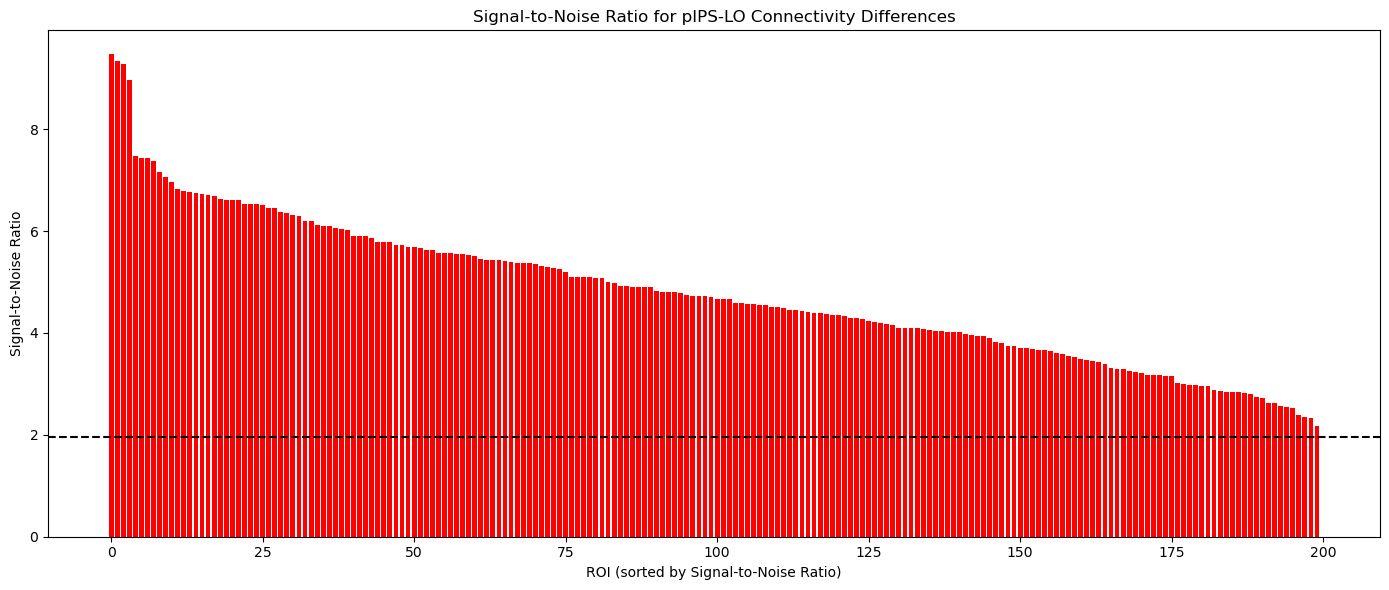

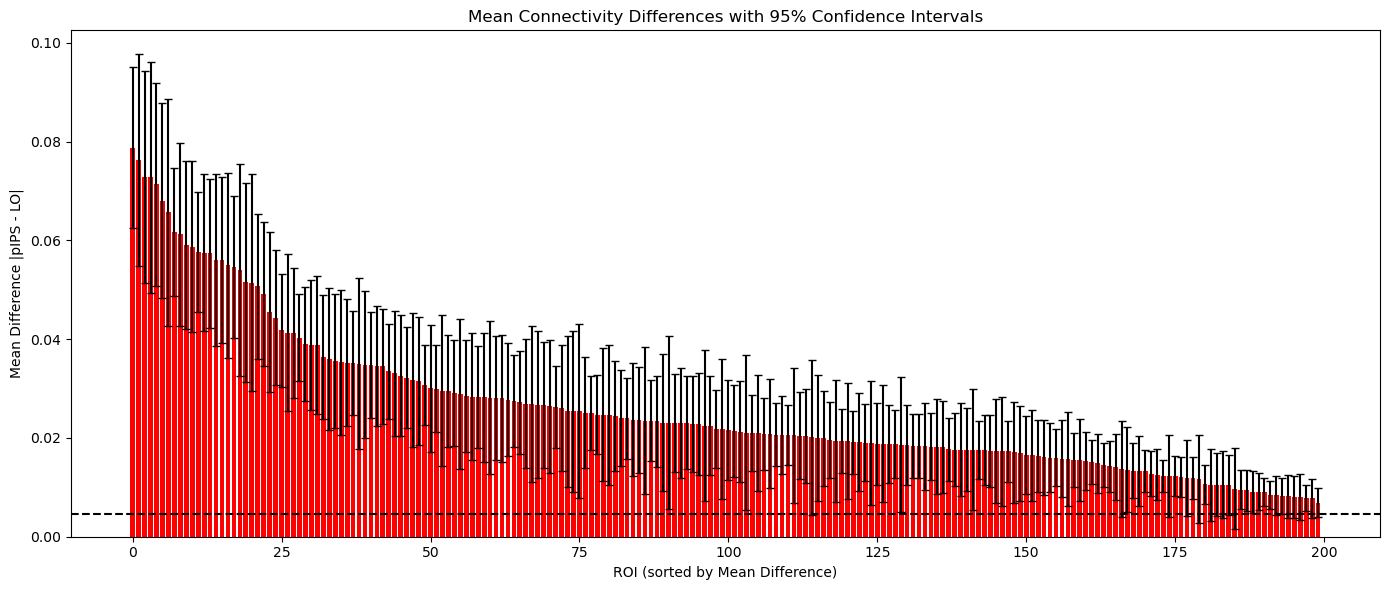

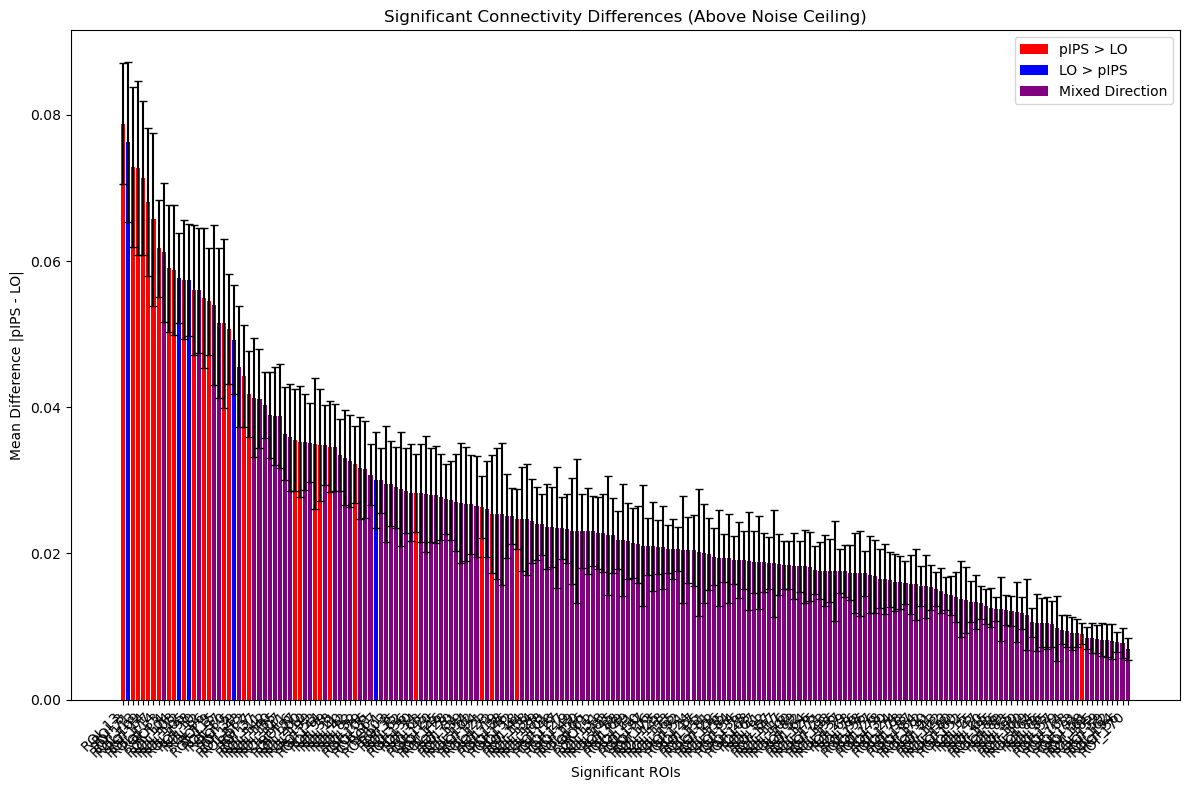

In [ ]:
# calculate noise ceiling and plot similarities and differences
import os
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image, datasets, plotting
from nilearn.maskers import NiftiLabelsMasker
from scipy import stats
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths for your data
study_dir = "/lab_data/behrmannlab/vlad/ptoc"
results_dir = '/user_data/csimmon2/git_repos/ptoc/results'
sub_info_path = '/user_data/csimmon2/git_repos/ptoc/sub_info.csv'
group_out_dir = f'{results_dir}/group_averages'
output_dir = f'{results_dir}/noise_ceiling'
os.makedirs(output_dir, exist_ok=True)

# Load Schaefer atlas for reference
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7, resolution_mm=2)
atlas_img = nib.load(atlas.maps)
atlas_labels = atlas.labels

def get_roi_name(roi_id):
    """Get the full name of an ROI from its ID"""
    try:
        idx = int(roi_id) - 1
        if 0 <= idx < len(atlas_labels):
            label = atlas_labels[idx]
            if isinstance(label, bytes):
                label = label.decode('utf-8')
            return label
    except:
        pass
    return f"ROI_{roi_id}"

def calculate_noise_ceiling():
    """Calculate noise ceiling for pIPS-LO connectivity differences using real subject data"""
    print("Calculating noise ceiling for pIPS-LO connectivity differences...")
    
    # Load subject info
    sub_info = pd.read_csv(sub_info_path)
    subjects = sub_info[sub_info['group'] == 'control']['sub'].tolist()
    print(f"Found {len(subjects)} control subjects")
    
    # Define ROIs and hemisphere
    rois = ['pIPS', 'LO']
    hemisphere = 'left'  # Using left hemisphere as in your previous analyses
    analysis_type = 'fc'  # Using functional connectivity
    
    # Setup atlas masker
    masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=False)
    
    # Load and process subject data
    subject_data = []
    for sub in subjects:
        sub_conn = {}
        
        # Load FC maps for this subject for both ROIs
        for roi in rois:
            fc_file = f'{study_dir}/{sub}/ses-01/derivatives/fc_mni/{sub}_{roi}_{hemisphere}_loc_{analysis_type}_mni.nii.gz'
            
            if os.path.exists(fc_file):
                try:
                    # Load the FC map
                    fc_img = nib.load(fc_file)
                    
                    # Extract ROI values using atlas
                    fc_values = masker.fit_transform(fc_img)[0]
                    
                    sub_conn[roi] = fc_values
                except Exception as e:
                    print(f"Error processing {fc_file}: {e}")
        
        # Only include subjects with both ROIs
        if len(sub_conn) == len(rois):
            subject_data.append(sub_conn)
    
    n_valid_subjects = len(subject_data)
    print(f"Successfully loaded data for {n_valid_subjects} subjects")
    
    if n_valid_subjects < 3:
        print("Not enough valid subjects to calculate noise ceiling")
        return None
    
    # Calculate absolute differences between pIPS and LO for each subject
    subject_diffs = []
    for subj_data in subject_data:
        # Calculate absolute difference between pIPS and LO
        diff = np.abs(subj_data['pIPS'] - subj_data['LO'])
        # Store the direction of difference
        direction = np.sign(subj_data['pIPS'] - subj_data['LO'])
        subject_diffs.append({'abs_diff': diff, 'direction': direction})
    
    # Create arrays for easier manipulation
    all_abs_diffs = np.array([subj['abs_diff'] for subj in subject_diffs])
    all_directions = np.array([subj['direction'] for subj in subject_diffs])
    
    # Calculate split-half reliability
    print("Calculating split-half reliability...")
    n_splits = 100  # Number of random splits to average over
    split_half_reliabilities = []
    
    for i in range(n_splits):
        # Randomly split subjects into two groups
        idx = np.random.permutation(n_valid_subjects)
        split1 = idx[:n_valid_subjects//2]
        split2 = idx[n_valid_subjects//2:]
        
        # Calculate average connectivity differences for each split
        split1_diffs = np.mean(all_abs_diffs[split1], axis=0)
        split2_diffs = np.mean(all_abs_diffs[split2], axis=0)
        
        # Calculate correlation between splits
        corr, _ = stats.pearsonr(split1_diffs, split2_diffs)
        split_half_reliabilities.append(corr)
    
    # Average split-half reliability
    mean_split_half = np.mean(split_half_reliabilities)
    
    # Spearman-Brown correction to estimate full-data reliability
    reliability_ceiling = (2 * mean_split_half) / (1 + mean_split_half)
    
    print(f"Split-half reliability: {mean_split_half:.3f}")
    print(f"Reliability ceiling (Spearman-Brown corrected): {reliability_ceiling:.3f}")
    
    # Bootstrap confidence intervals
    print("Calculating bootstrap confidence intervals...")
    n_boots = 100000
    boot_means = np.zeros((n_boots, all_abs_diffs.shape[1]))
    
    for i in range(n_boots):
        # Resample subjects with replacement
        boot_idx = resample(range(n_valid_subjects), replace=True)
        boot_diffs = all_abs_diffs[boot_idx]
        # Calculate mean for this bootstrap sample
        boot_means[i] = np.mean(boot_diffs, axis=0)
    
    # Calculate confidence intervals
    ci_lower = np.percentile(boot_means, 2.5, axis=0)
    ci_upper = np.percentile(boot_means, 97.5, axis=0)
    
    # Calculate average across subjects and standard error
    mean_abs_diffs = np.mean(all_abs_diffs, axis=0)
    std_error = np.std(all_abs_diffs, axis=0) / np.sqrt(n_valid_subjects)
    
    # Calculate signal-to-noise ratio (SNR)
    snr = mean_abs_diffs / std_error
    
    # Calculating p-values for each ROI
    p_values = np.zeros(all_abs_diffs.shape[1])
    for i in range(all_abs_diffs.shape[1]):
        t_stat, p_val = stats.ttest_1samp(all_abs_diffs[:, i], 0)
        p_values[i] = p_val
    
    # Apply Bonferroni correction for multiple comparisons
    alpha = 0.05
    bonferroni_alpha = alpha / len(p_values)
    significant_rois = p_values < bonferroni_alpha
    
    # Calculate direction consistency
    direction_consistency = np.abs(np.mean(all_directions, axis=0))
    
    # Calculate noise thresholds
    # Threshold based on split-half reliability
    threshold_reliability = np.mean(mean_abs_diffs) * (1 - reliability_ceiling) * 1.96
    
    # Threshold based on SNR
    threshold_snr = 1.96
    
    # Combine results into a dataframe
    noise_ceiling_results = pd.DataFrame({
        'ROI_ID': np.arange(1, all_abs_diffs.shape[1] + 1),
        'Mean_Difference': mean_abs_diffs,
        'Std_Error': std_error,
        'Signal_to_Noise': snr,
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Direction_Consistency': direction_consistency,
        'p_value': p_values,
        'Significant_Bonferroni': significant_rois,
        'Above_Reliability_Threshold': mean_abs_diffs > threshold_reliability,
        'Above_SNR_Threshold': snr > threshold_snr
    })
    
    # Add ROI names
    noise_ceiling_results['ROI_Name'] = noise_ceiling_results['ROI_ID'].apply(get_roi_name)
    
    # Add a composite significance measure
    # An ROI is deemed significant if it meets at least 2 of 3 criteria
    criteria_count = (
        noise_ceiling_results['Significant_Bonferroni'].astype(int) +
        noise_ceiling_results['Above_Reliability_Threshold'].astype(int) +
        noise_ceiling_results['Above_SNR_Threshold'].astype(int)
    )
    noise_ceiling_results['Significant'] = criteria_count >= 2
    
    # Find significant ROIs for different metrics
    sig_snr = noise_ceiling_results[noise_ceiling_results['Above_SNR_Threshold']]
    sig_reliability = noise_ceiling_results[noise_ceiling_results['Above_Reliability_Threshold']]
    sig_combined = noise_ceiling_results[noise_ceiling_results['Significant']]
    
    print(f"Found {len(sig_snr)} ROIs above SNR threshold")
    print(f"Found {len(sig_reliability)} ROIs above reliability threshold")
    print(f"Found {len(sig_combined)} ROIs significant by combined criteria")
    
    # Visualizations
    # 1. SNR plot
    plt.figure(figsize=(14, 6))
    sorted_by_snr = noise_ceiling_results.sort_values('Signal_to_Noise', ascending=False)
    x = np.arange(len(sorted_by_snr))
    plt.bar(x, sorted_by_snr['Signal_to_Noise'], 
            color=[('red' if val else 'gray') for val in sorted_by_snr['Significant']])
    plt.axhline(y=threshold_snr, color='black', linestyle='--', label='SNR Threshold (1.96)')
    plt.xlabel('ROI (sorted by Signal-to-Noise Ratio)')
    plt.ylabel('Signal-to-Noise Ratio')
    plt.title('Signal-to-Noise Ratio for pIPS-LO Connectivity Differences')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/snr_by_roi.png', dpi=300)
    #plt.close()
    
    # 2. Mean differences with confidence intervals
    plt.figure(figsize=(14, 6))
    sorted_by_diff = noise_ceiling_results.sort_values('Mean_Difference', ascending=False)
    x = np.arange(len(sorted_by_diff))
    plt.bar(x, sorted_by_diff['Mean_Difference'], 
            color=[('red' if val else 'gray') for val in sorted_by_diff['Significant']])
    plt.errorbar(x, sorted_by_diff['Mean_Difference'], 
                 yerr=(sorted_by_diff['CI_Upper'] - sorted_by_diff['CI_Lower'])/2, 
                 fmt='none', color='black', capsize=3)
    plt.axhline(y=threshold_reliability, color='black', linestyle='--', label='Reliability Threshold')
    plt.xlabel('ROI (sorted by Mean Difference)')
    plt.ylabel('Mean Difference |pIPS - LO|')
    plt.title('Mean Connectivity Differences with 95% Confidence Intervals')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/mean_diff_with_ci.png', dpi=300)
    #plt.close()
    
    # 3. Highlight significant ROIs
    sig_sorted = sig_combined.sort_values('Mean_Difference', ascending=False)
    if len(sig_sorted) > 0:
        plt.figure(figsize=(12, 8))
        x = np.arange(len(sig_sorted))
        # Create color coding by direction consistency
        colors = []
        for _, row in sig_sorted.iterrows():
            # Red for pIPS > LO, Blue for LO > pIPS
            if row['Direction_Consistency'] > 0.7:  # Strong consistency
                roi_id = row['ROI_ID']
                direction = np.mean(all_directions[:, int(roi_id)-1])
                if direction > 0:
                    colors.append('red')  # pIPS > LO
                else:
                    colors.append('blue')  # LO > pIPS
            else:
                colors.append('purple')  # Mixed
        
        plt.bar(x, sig_sorted['Mean_Difference'], color=colors)
        plt.errorbar(x, sig_sorted['Mean_Difference'], 
                     yerr=sig_sorted['Std_Error'], fmt='none', color='black', capsize=3)
        
        # Add ROI labels
        plt.xticks(x, [f"ROI_{id}" for id in sig_sorted['ROI_ID']], rotation=45, ha='right')
        
        plt.xlabel('Significant ROIs')
        plt.ylabel('Mean Difference |pIPS - LO|')
        plt.title('Significant Connectivity Differences (Above Noise Ceiling)')
        
        # Add a legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='red', label='pIPS > LO'),
            Patch(facecolor='blue', label='LO > pIPS'),
            Patch(facecolor='purple', label='Mixed Direction')
        ]
        plt.legend(handles=legend_elements)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/significant_rois.png', dpi=300)
        #plt.close()
    
    # Save results to CSV
    noise_ceiling_results.to_csv(f'{output_dir}/noise_ceiling_results.csv', index=False)
    
    return {
        'noise_ceiling_results': noise_ceiling_results,
        'reliability_ceiling': reliability_ceiling,
        'threshold_reliability': threshold_reliability,
        'threshold_snr': threshold_snr,
        'significant_roi_count': len(sig_combined)
    }

# Run the analysis
results = calculate_noise_ceiling()

# Print top significant ROIs
if results and 'noise_ceiling_results' in results:
    sig_rois = results['noise_ceiling_results'][results['noise_ceiling_results']['Significant']]
    if len(sig_rois) > 0:
        print("\nTop ROIs above noise ceiling (reliable connectivity differences):")
        for i, (_, row) in enumerate(sig_rois.sort_values('Mean_Difference', ascending=False).iterrows()):
            if i < 15:  # Print top 15
                print(f"{i+1}. ROI_{row['ROI_ID']} ({row['ROI_Name']}): " +
                      f"Mean Diff = {row['Mean_Difference']:.2f}, SNR = {row['Signal_to_Noise']:.2f}")
    else:
        print("\nNo ROIs found to be above the noise ceiling.")
else:
    print("Analysis did not complete successfully.")

Analyzing connectivity fingerprints for pIPS and LO regions...
Found 19 control subjects
Successfully loaded data for 19 subjects
Mean connectivity vector correlation: 0.749 ± 0.226
Performing bootstrap analysis...
Found 102 ROIs with significant differences via bootstrap
Performing Leave-One-Out Cross-Validation...
LOO reliability threshold: 0.002
Found 20 ROIs with high reliability via LOO
Found 20 ROIs significant in both bootstrap and LOO

Top most reliable connectivity differences:
1. ROI_13 (7Networks_LH_Vis_13): Diff = 0.079 [0.062, 0.095], Direction: pIPS > LO
2. ROI_3 (7Networks_LH_Vis_3): Diff = -0.076 [-0.098, -0.055], Direction: LO > pIPS
3. ROI_71 (7Networks_LH_Cont_pCun_1): Diff = 0.073 [0.053, 0.096], Direction: pIPS > LO
4. ROI_113 (7Networks_RH_Vis_13): Diff = 0.072 [0.050, 0.097], Direction: pIPS > LO
5. ROI_109 (7Networks_RH_Vis_9): Diff = 0.068 [0.045, 0.091], Direction: pIPS > LO
6. ROI_177 (7Networks_RH_Cont_pCun_1): Diff = 0.066 [0.045, 0.091], Direction: pIPS > 

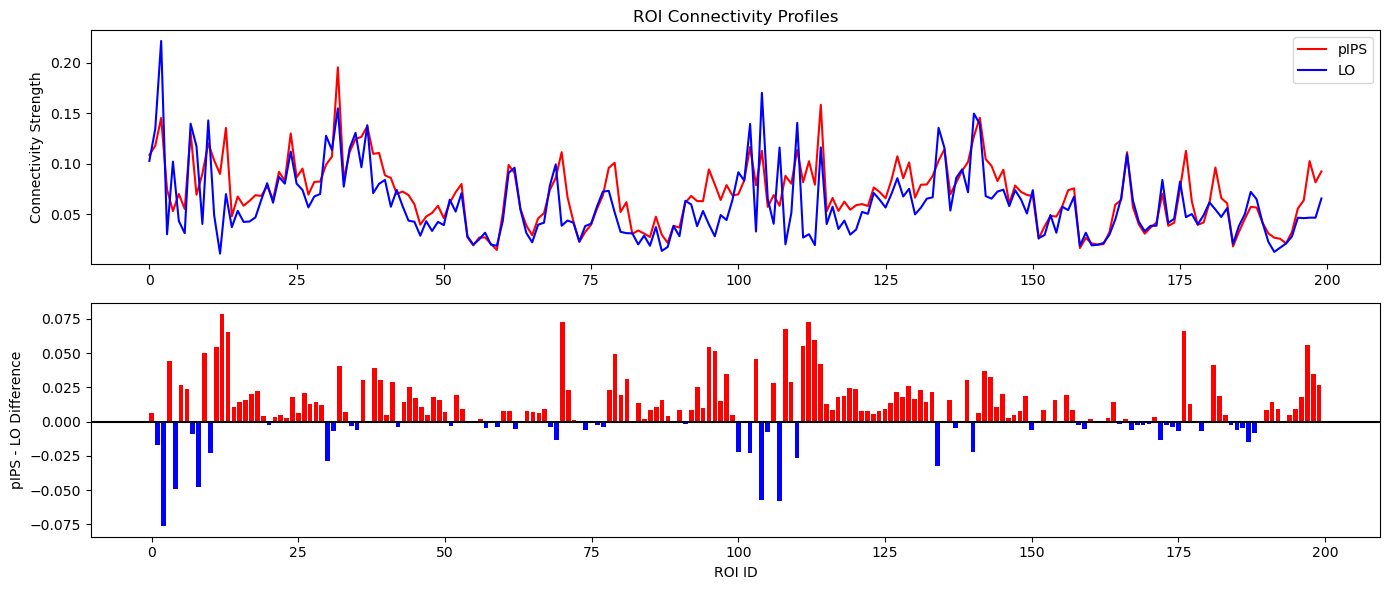

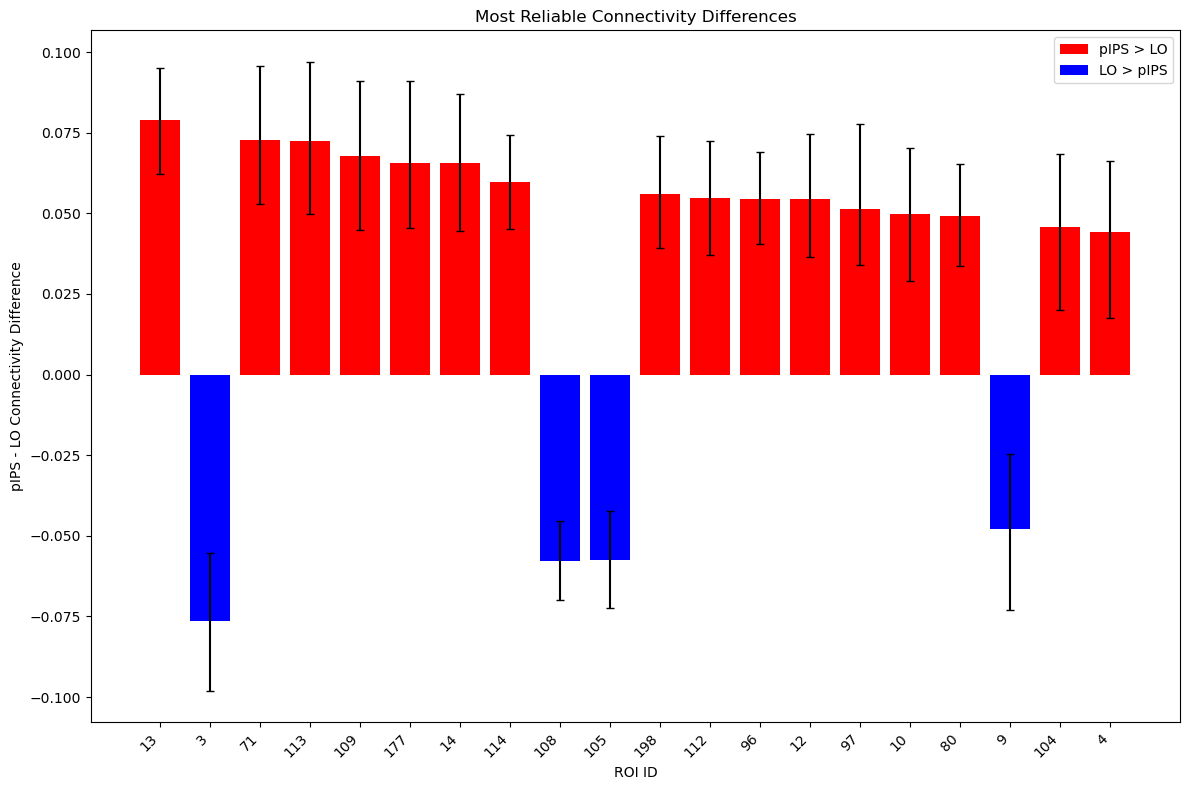

In [15]:
def analyze_connectivity_fingerprints():
    """
    Analyze connectivity fingerprints between pIPS and LO regions with bootstrap 
    and leave-one-out cross-validation to identify reliable differences
    """
    print("Analyzing connectivity fingerprints for pIPS and LO regions...")
    
    # Load subject info
    sub_info = pd.read_csv(sub_info_path)
    subjects = sub_info[sub_info['group'] == 'control']['sub'].tolist()
    print(f"Found {len(subjects)} control subjects")
    
    # Define ROIs and hemisphere
    rois = ['pIPS', 'LO']
    hemisphere = 'left'
    analysis_type = 'fc'
    
    # Setup atlas masker
    masker = NiftiLabelsMasker(labels_img=atlas_img, standardize=False)
    
    # Load and process subject data
    subject_data = []
    for sub in subjects:
        sub_conn = {}
        
        # Load FC maps for this subject for both ROIs
        for roi in rois:
            fc_file = f'{study_dir}/{sub}/ses-01/derivatives/fc_mni/{sub}_{roi}_{hemisphere}_loc_{analysis_type}_mni.nii.gz'
            
            if os.path.exists(fc_file):
                try:
                    # Load the FC map
                    fc_img = nib.load(fc_file)
                    
                    # Extract ROI values using atlas
                    fc_values = masker.fit_transform(fc_img)[0]
                    
                    sub_conn[roi] = fc_values
                except Exception as e:
                    print(f"Error processing {fc_file}: {e}")
        
        # Only include subjects with both ROIs
        if len(sub_conn) == len(rois):
            subject_data.append(sub_conn)
    
    n_valid_subjects = len(subject_data)
    print(f"Successfully loaded data for {n_valid_subjects} subjects")
    
    # Initialize arrays for analysis
    n_rois = len(atlas_labels)
    pips_fc = np.zeros((n_valid_subjects, n_rois))
    lo_fc = np.zeros((n_valid_subjects, n_rois))
    
    # Fill arrays with connectivity data
    for i, subj_data in enumerate(subject_data):
        pips_fc[i, :] = subj_data['pIPS']
        lo_fc[i, :] = subj_data['LO']
    
    # Calculate connectivity vector correlation for each subject
    # This directly compares the connectivity fingerprints of pIPS and LO
    vector_correlations = np.zeros(n_valid_subjects)
    for i in range(n_valid_subjects):
        vector_correlations[i] = np.corrcoef(pips_fc[i, :], lo_fc[i, :])[0, 1]
    
    print(f"Mean connectivity vector correlation: {np.mean(vector_correlations):.3f} ± {np.std(vector_correlations):.3f}")
    
    # Calculate mean connectivity profiles
    mean_pips = np.mean(pips_fc, axis=0)
    mean_lo = np.mean(lo_fc, axis=0)
    
    # Calculate difference profile
    diff_profile = mean_pips - mean_lo
    abs_diff_profile = np.abs(diff_profile)
    
    # 1. Bootstrap analysis for robust differences
    print("Performing bootstrap analysis...")
    n_boots = 100000
    boot_diffs = np.zeros((n_boots, n_rois))
    
    for i in range(n_boots):
        # Resample subjects with replacement
        boot_idx = resample(range(n_valid_subjects), replace=True, n_samples=n_valid_subjects)
        
        # Calculate mean difference for this bootstrap sample
        boot_pips = np.mean(pips_fc[boot_idx, :], axis=0)
        boot_lo = np.mean(lo_fc[boot_idx, :], axis=0)
        boot_diffs[i, :] = boot_pips - boot_lo
    
    # Calculate confidence intervals
    ci_lower = np.percentile(boot_diffs, 2.5, axis=0)
    ci_upper = np.percentile(boot_diffs, 97.5, axis=0)
    
    # Identify significant differences (95% CI doesn't cross zero)
    sig_boot = (ci_lower > 0) | (ci_upper < 0)
    sig_boot_count = np.sum(sig_boot)
    print(f"Found {sig_boot_count} ROIs with significant differences via bootstrap")
    
    # 2. Leave-One-Out Cross-Validation for reliability
    print("Performing Leave-One-Out Cross-Validation...")
    loo_reliability = np.zeros(n_rois)
    
    for left_out in range(n_valid_subjects):
        # Create the training set (all subjects except the left out one)
        train_idx = list(range(n_valid_subjects))
        train_idx.remove(left_out)
        
        # Calculate mean training differences
        train_diff = np.mean(pips_fc[train_idx, :] - lo_fc[train_idx, :], axis=0)
        
        # Test on left out subject
        test_diff = pips_fc[left_out, :] - lo_fc[left_out, :]
        
        # Correlate training and test differences
        loo_reliability += np.abs(train_diff * test_diff)
    
    # Average across all leave-one-out iterations
    loo_reliability = loo_reliability / n_valid_subjects
    
    # Set threshold at 90th percentile of LOO reliability values
    loo_threshold = np.percentile(loo_reliability, 90)
    sig_loo = loo_reliability >= loo_threshold
    sig_loo_count = np.sum(sig_loo)
    
    print(f"LOO reliability threshold: {loo_threshold:.3f}")
    print(f"Found {sig_loo_count} ROIs with high reliability via LOO")
    
    # 3. Combined significance from both methods
    sig_combined = sig_boot & sig_loo
    sig_combined_count = np.sum(sig_combined)
    
    print(f"Found {sig_combined_count} ROIs significant in both bootstrap and LOO")
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'ROI_ID': np.arange(1, n_rois + 1),
        'pIPS_Connectivity': mean_pips,
        'LO_Connectivity': mean_lo,
        'Difference': diff_profile,
        'Abs_Difference': abs_diff_profile,
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Bootstrap_Significant': sig_boot,
        'LOO_Reliability': loo_reliability,
        'LOO_Significant': sig_loo,
        'Combined_Significant': sig_combined
    })
    
    # Add ROI names
    results_df['ROI_Name'] = results_df['ROI_ID'].apply(get_roi_name)
    
    # Identify ROI direction (pIPS>LO or LO>pIPS)
    results_df['Direction'] = np.where(results_df['Difference'] > 0, 'pIPS > LO', 'LO > pIPS')
    
    # Visualize connectivity profiles
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    x = np.arange(n_rois)
    plt.plot(x, mean_pips, 'r-', label='pIPS')
    plt.plot(x, mean_lo, 'b-', label='LO')
    plt.ylabel('Connectivity Strength')
    plt.title('ROI Connectivity Profiles')
    plt.legend()
    
    plt.subplot(2, 1, 2)
    colors = ['red' if val > 0 else 'blue' for val in diff_profile]
    plt.bar(x, diff_profile, color=colors)
    plt.axhline(y=0, color='black', linestyle='-')
    plt.ylabel('pIPS - LO Difference')
    plt.xlabel('ROI ID')
    plt.tight_layout()
    plt.savefig(f'{output_dir}/connectivity_profiles.png', dpi=300)
    
    # Visualize top reliable differences
    top_rois = results_df[results_df['Combined_Significant']].sort_values('Abs_Difference', ascending=False)
    
    if len(top_rois) > 0:
        plt.figure(figsize=(12, 8))
        x = np.arange(len(top_rois))
        
        # Color by direction
        colors = np.where(top_rois['Difference'] > 0, 'red', 'blue')
        
        plt.bar(x, top_rois['Difference'], color=colors)
        plt.errorbar(x, top_rois['Difference'], 
                    yerr=[top_rois['Difference'] - top_rois['CI_Lower'], 
                          top_rois['CI_Upper'] - top_rois['Difference']], 
                    fmt='none', color='black', capsize=3)
        
        # Add ROI labels
        plt.xticks(x, [f"{row['ROI_ID']}" for _, row in top_rois.iterrows()], rotation=45, ha='right')
        
        plt.xlabel('ROI ID')
        plt.ylabel('pIPS - LO Connectivity Difference')
        plt.title('Most Reliable Connectivity Differences')
        
        # Add a legend
        from matplotlib.patches import Patch
        legend_elements = [
            Patch(facecolor='red', label='pIPS > LO'),
            Patch(facecolor='blue', label='LO > pIPS')
        ]
        plt.legend(handles=legend_elements)
        
        plt.tight_layout()
        plt.savefig(f'{output_dir}/reliable_differences.png', dpi=300)
    
    # Save results to CSV
    results_df.to_csv(f'{output_dir}/connectivity_fingerprint_results.csv', index=False)
    
    # Print top ROIs
    if len(top_rois) > 0:
        print("\nTop most reliable connectivity differences:")
        for i, (_, row) in enumerate(top_rois.head(15).iterrows()):
            print(f"{i+1}. ROI_{row['ROI_ID']} ({row['ROI_Name']}): " +
                f"Diff = {row['Difference']:.3f} [{row['CI_Lower']:.3f}, {row['CI_Upper']:.3f}], " +
                f"Direction: {row['Direction']}")
    
    return {
        'results': results_df,
        'bootstrap_sig_count': sig_boot_count,
        'loo_sig_count': sig_loo_count,
        'combined_sig_count': sig_combined_count,
        'vector_correlations': vector_correlations
    }

# Run the analysis
results = analyze_connectivity_fingerprints()